#Predicción de precios con Random Forest
En este caso con Random forest ya no utilizaremos solo 1 árbol de decisión, sino que varios árboles, de los cuales se promediara la predicción de cada uno de estos. En general este modelo genera mejores predicciones.

In [93]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [94]:
# Fuente: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
melbourne_file_path = '/content/drive/MyDrive/Data Kaggle/melb_data.csv'
# read la data
melbourne_data = pd.read_csv(melbourne_file_path) 
# imprimimos un resumen
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Visualizamos la data sin filtrar

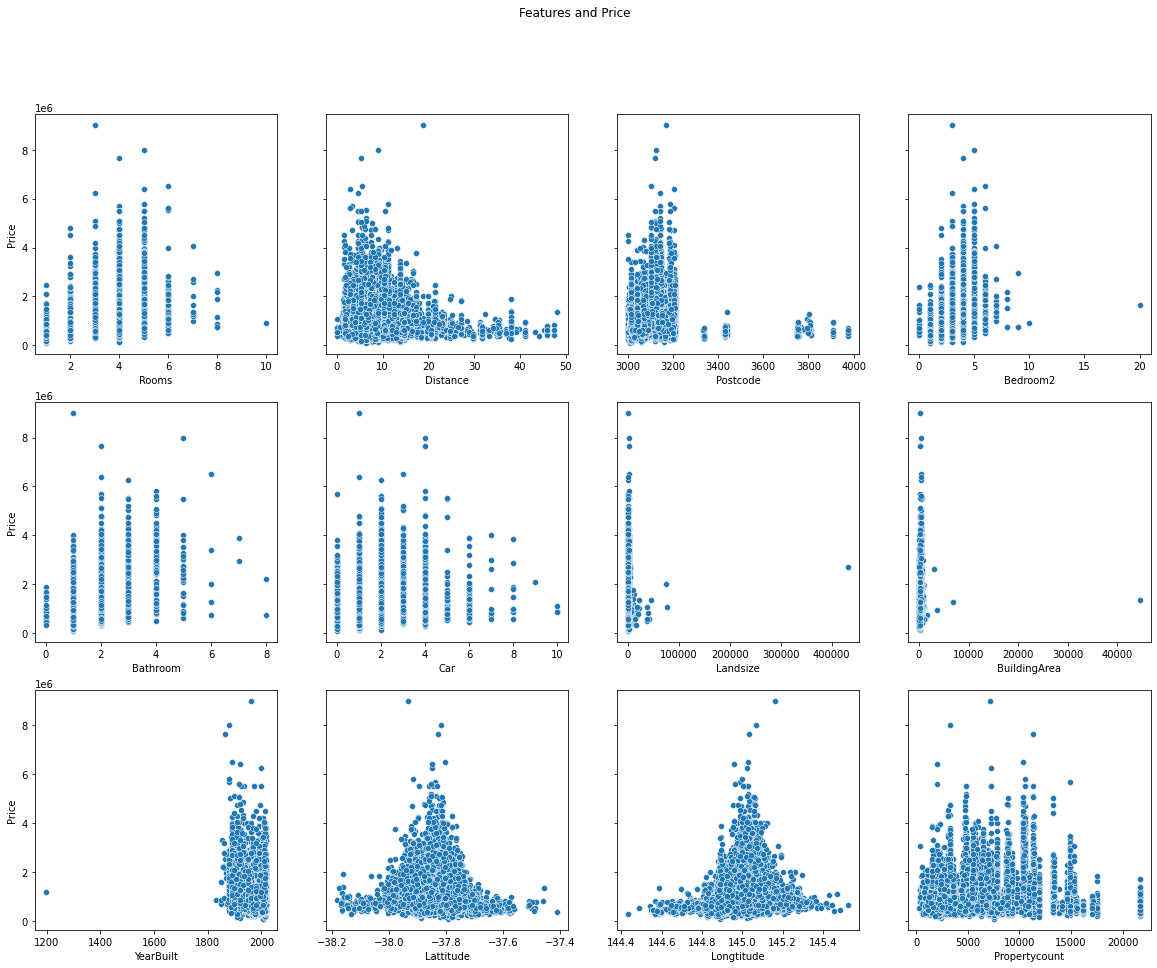

In [95]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(20,15))
fig.suptitle('Features and Price')

sns.scatterplot(ax=axes[0, 0], data = melbourne_data, x='Rooms', y='Price') # Grafiquemos como se ven nuestros datos.
sns.scatterplot(ax=axes[0, 1], data = melbourne_data, x='Distance', y='Price')
sns.scatterplot(ax=axes[0, 2], data = melbourne_data, x='Postcode', y='Price')
sns.scatterplot(ax=axes[0, 3], data = melbourne_data, x='Bedroom2', y='Price')
sns.scatterplot(ax=axes[1, 0], data = melbourne_data, x='Bathroom', y='Price')
sns.scatterplot(ax=axes[1, 1], data = melbourne_data, x='Car', y='Price')
sns.scatterplot(ax=axes[1, 2], data = melbourne_data, x='Landsize', y='Price')
sns.scatterplot(ax=axes[1, 3], data = melbourne_data, x='BuildingArea', y='Price')
sns.scatterplot(ax=axes[2, 0], data = melbourne_data, x='YearBuilt', y='Price')
sns.scatterplot(ax=axes[2, 1], data = melbourne_data, x='Lattitude', y='Price')
sns.scatterplot(ax=axes[2, 2], data = melbourne_data, x='Longtitude', y='Price')
sns.scatterplot(ax=axes[2, 3], data = melbourne_data, x='Propertycount', y='Price')

Creamos una función para limpiar Outliers

In [96]:
#Función para obtener límite de outliers según rango intercuartílico
def outlierLimites(columna):
    q1 = columna.quantile(0.25) 
    q3 = columna.quantile(0.75)
    iqr = q3-q1
    return [q1-1.5*iqr,q3+1.5*iqr] #Se obtiene límite inferior y superior

Limpiamos los Outliers

In [97]:
Rooms = melbourne_data[['Rooms']].dropna()
limitesRooms = outlierLimites(Rooms) #Límite inferior y superior para outliers

Price = melbourne_data[['Price']].dropna()
limitesPrice = outlierLimites(Price)

Distance = melbourne_data[['Distance']].dropna()
limitesDistance = outlierLimites(Distance)

Postcode = melbourne_data[['Postcode']].dropna()
limitesPostcode = outlierLimites(Postcode)

Bedroom2 = melbourne_data[['Bedroom2']].dropna()
limitesBedroom2 = outlierLimites(Bedroom2)

Bathroom = melbourne_data[['Bathroom']].dropna()
limitesBathroom = outlierLimites(Bathroom)

Car = melbourne_data[['Car']].dropna()
limitesCar = outlierLimites(Car)

Landsize = melbourne_data[['Landsize']].dropna()
limitesLandsize = outlierLimites(Landsize)

BuildingArea = melbourne_data[['BuildingArea']].dropna()
limitesBuildingArea = outlierLimites(BuildingArea)

YearBuilt = melbourne_data[['YearBuilt']].dropna()
limitesYearBuilt = outlierLimites(YearBuilt)

Lattitude = melbourne_data[['Lattitude']].dropna()
limitesLattitude = outlierLimites(Lattitude)

Longtitude = melbourne_data[['Longtitude']].dropna()
limitesLongtitude = outlierLimites(Longtitude)

Propertycount = melbourne_data[['Propertycount']].dropna()
limitesPropertycount = outlierLimites(Propertycount)

In [98]:
melbourne_data.where((Rooms > limitesRooms[0]) & (Rooms < limitesRooms[1]),inplace=True)
melbourne_data.where((Price > limitesPrice[0]) & (Price < limitesPrice[1]),inplace=True)
melbourne_data.where((Distance > limitesDistance[0]) & (Distance < limitesDistance[1]),inplace=True)
melbourne_data.where((Postcode > limitesPostcode[0]) & (Postcode < limitesPostcode[1]),inplace=True)
melbourne_data.where((Bedroom2 > limitesBedroom2[0]) & (Bedroom2 < limitesBedroom2[1]),inplace=True)
melbourne_data.where((Bathroom > limitesBathroom[0]) & (Bathroom < limitesBathroom[1]),inplace=True)
melbourne_data.where((Car > limitesCar[0]) & (Car < limitesCar[1]),inplace=True)
melbourne_data.where((Landsize > limitesLandsize[0]) & (Landsize < limitesLandsize[1]),inplace=True)
melbourne_data.where((BuildingArea > limitesBuildingArea[0]) & (BuildingArea < limitesBuildingArea[1]),inplace=True)
melbourne_data.where((YearBuilt > limitesYearBuilt[0]) & (YearBuilt < limitesYearBuilt[1]),inplace=True)
melbourne_data.where((Lattitude > limitesLattitude[0]) & (Lattitude < limitesLattitude[1]),inplace=True)
melbourne_data.where((Longtitude > limitesLongtitude[0]) & (Longtitude < limitesLongtitude[1]),inplace=True)
melbourne_data.where((Propertycount > limitesPropertycount[0]) & (Propertycount < limitesPropertycount[1]),inplace=True)


melbourne_data = melbourne_data.dropna(axis=0)   #eliminams filas con valornes nulos

In [105]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,4867.000000,4.867000e+03,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000
mean,2.733922,9.618826e+05,8.847442,3092.923772,2.706595,1.451407,1.387919,335.876926,122.366711,1963.076022,-37.807198,144.985752,6988.896240
std,0.818310,4.467179e+05,4.239527,60.812060,0.812082,0.579350,0.700480,273.500090,50.701177,36.933900,0.065769,0.083262,3691.511236
min,1.000000,1.310000e+05,0.000000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1860.000000,-38.006440,144.739460,389.000000
25%,2.000000,6.186750e+05,5.600000,3041.000000,2.000000,1.000000,1.000000,113.000000,86.000000,1940.000000,-37.852950,144.923835,4048.000000
50%,3.000000,8.640000e+05,8.400000,3078.000000,3.000000,1.000000,1.000000,286.000000,115.000000,1970.000000,-37.801000,144.989900,6543.000000
75%,3.000000,1.250000e+06,11.800000,3146.000000,3.000000,2.000000,2.000000,572.000000,151.000000,1999.000000,-37.760150,145.047505,9028.000000
max,4.000000,2.345000e+06,22.700000,3207.000000,4.000000,3.000000,3.000000,1324.000000,293.000000,2018.000000,-37.612360,145.249070,17496.000000


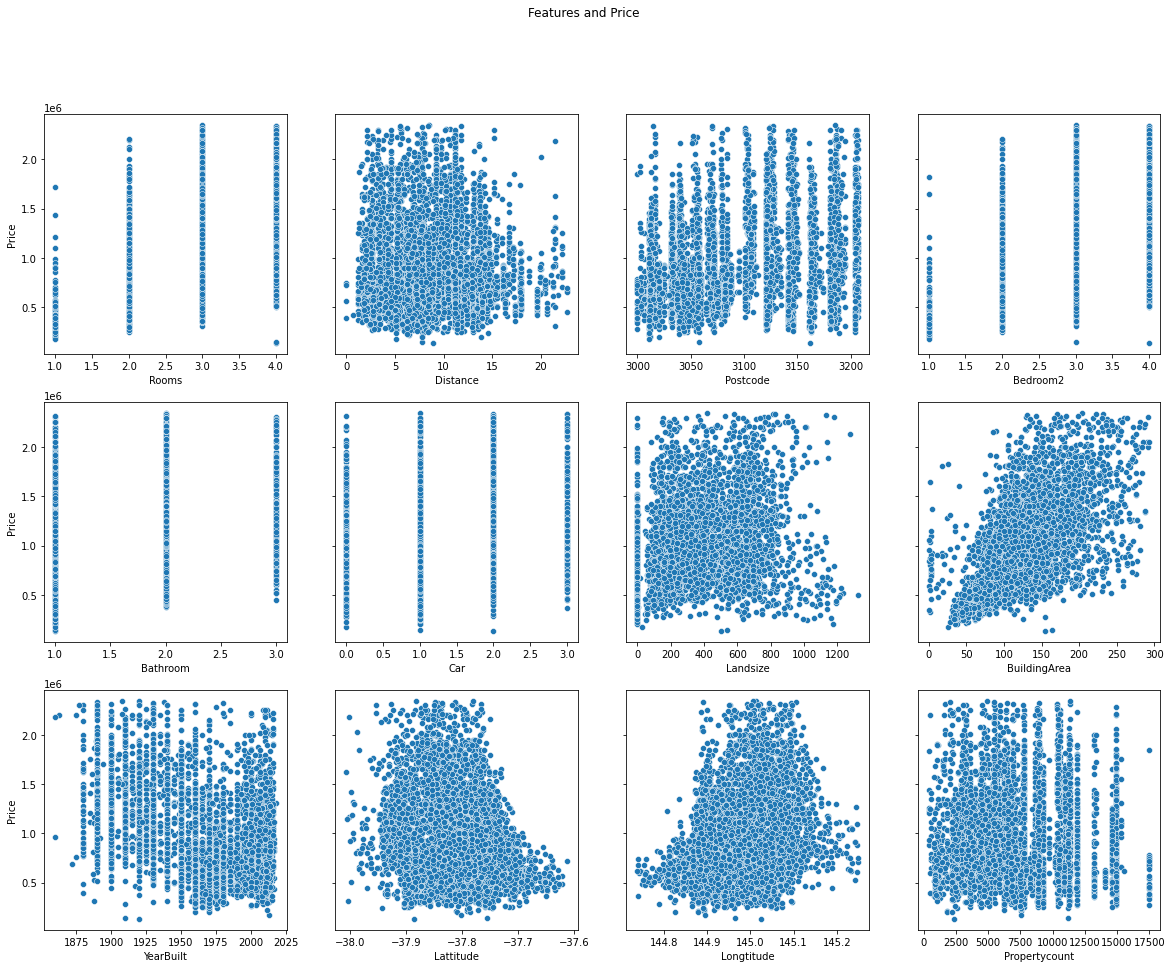

In [99]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(20,15))
fig.suptitle('Features and Price')

sns.scatterplot(ax=axes[0, 0], data = melbourne_data, x='Rooms', y='Price') # Grafiquemos como se ven nuestros datos.
sns.scatterplot(ax=axes[0, 1], data = melbourne_data, x='Distance', y='Price')
sns.scatterplot(ax=axes[0, 2], data = melbourne_data, x='Postcode', y='Price')
sns.scatterplot(ax=axes[0, 3], data = melbourne_data, x='Bedroom2', y='Price')
sns.scatterplot(ax=axes[1, 0], data = melbourne_data, x='Bathroom', y='Price')
sns.scatterplot(ax=axes[1, 1], data = melbourne_data, x='Car', y='Price')
sns.scatterplot(ax=axes[1, 2], data = melbourne_data, x='Landsize', y='Price')
sns.scatterplot(ax=axes[1, 3], data = melbourne_data, x='BuildingArea', y='Price')
sns.scatterplot(ax=axes[2, 0], data = melbourne_data, x='YearBuilt', y='Price')
sns.scatterplot(ax=axes[2, 1], data = melbourne_data, x='Lattitude', y='Price')
sns.scatterplot(ax=axes[2, 2], data = melbourne_data, x='Longtitude', y='Price')
sns.scatterplot(ax=axes[2, 3], data = melbourne_data, x='Propertycount', y='Price')

##Seleccionamos la variable dependiente y las variables independientes que nos permitirán hacer la predicción

Seleccionaremos variables de manera aleatoria.

In [106]:
y = melbourne_data['Price']

X = melbourne_data[['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']]

In [107]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3.0,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2.0,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


##Construimos el modelo

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [111]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)   # Dividimos la data en entrenamiento y validacion #random state asegura siempre tener la misma division de la data

In [112]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

133579.34027624526


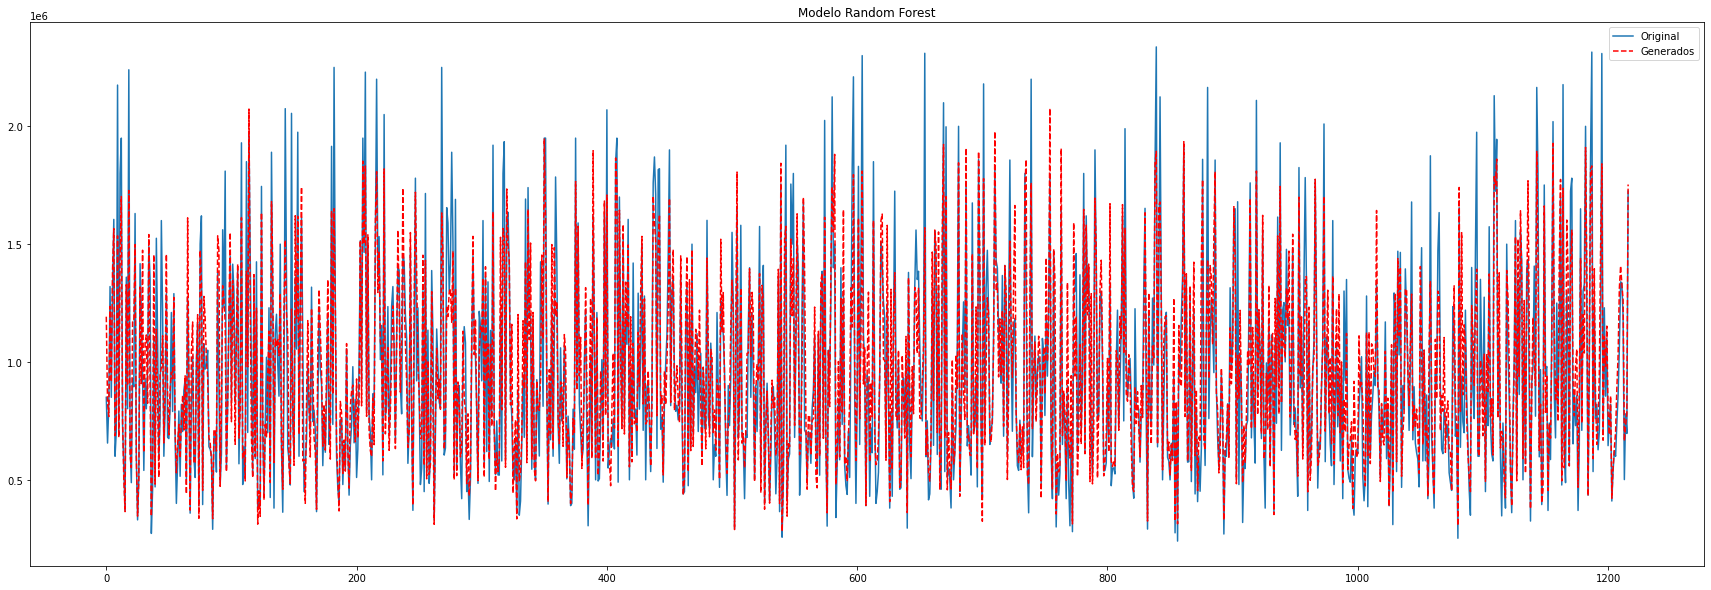

In [113]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(len(val_y)),val_y,label="Original")
plt.plot(np.arange(len(val_y)),melb_preds,'--',color="red", label="Generados")

plt.legend()
plt.title('Modelo Random Forest')
plt.show()

##Conclusiones
Con Random Forest logramos mejorar el MAE frente a un modelo de Árbol de decisiones. Nuestro MAE con este modelo es de 133.579, lo cual quiere decir que nuestra predicción se aleja en promedio 133.579 frente al precio real promedio que es 961.882 dólares (media con data limpia).

##Como podemos mejorar el modelo?

##Se buscará las variables independientes que mejor expliquen la variable dependiente, a través de análisis de Feature importance

In [115]:
X = melbourne_data[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]

y = melbourne_data['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0) 

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

importance = forest_model.feature_importances_

for i,v in enumerate(importance):
    print(f'feature: {i}, Score: {v}')

feature: 0, Score: 0.015266294050855254
feature: 1, Score: 0.09458436114713263
feature: 2, Score: 0.09747940467578983
feature: 3, Score: 0.011982016320748034
feature: 4, Score: 0.007903235612544662
feature: 5, Score: 0.006010188343985067
feature: 6, Score: 0.07049063863225298
feature: 7, Score: 0.39973044249704376
feature: 8, Score: 0.14889554520201692
feature: 9, Score: 0.07016840764243223
feature: 10, Score: 0.057062984937337614
feature: 11, Score: 0.020426480937860987


<function matplotlib.pyplot.show>

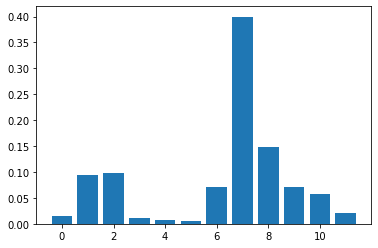

In [116]:
plt.bar([x for x in range(len(importance))], importance)
plt.show

Seleccionaremos la variables 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount' y sacamos del modelo la variable'Bathroom' y 'Car'

In [121]:
X = melbourne_data[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]

y = melbourne_data['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0) 

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

130054.65304730601


Logramos optimizar el modelo y llegar a un MAE de 130.054

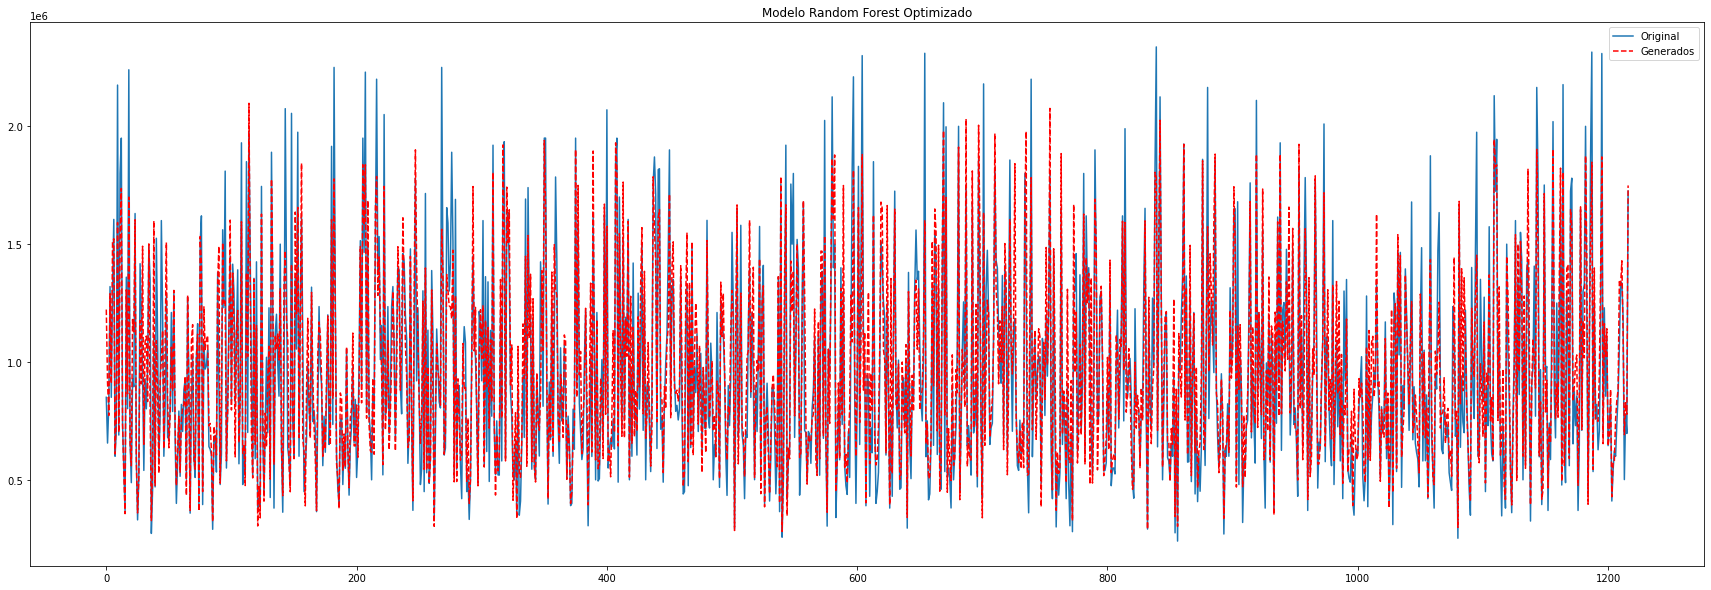

In [123]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(len(val_y)),val_y,label="Original")
plt.plot(np.arange(len(val_y)),melb_preds,'--',color="red", label="Generados")

plt.legend()
plt.title('Modelo Random Forest Optimizado')
plt.show()

##Conclusiones
Logramos optimizar el MAE a través de la limpieza de los datos y eliminación de Outliers y la elección de las variables a través de Feature importance.